# Data

Read dataset

In [1]:
import pandas as pd

dataset = pd.read_csv('data/feature-selection-dataset.csv', header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,8.0,1.0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,53.0,1.0,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,24.0,1.0,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,34.0,1.0,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,42.0,1.0,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


Now, split dataset into data (features) and targets

In [2]:
data = dataset.drop([101], axis=1)
targets = dataset[[101]]

print('\nData')
display(data.head())

print('\nTargets')
display(targets.head())


Data


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,8.0,1.0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32
1,53.0,1.0,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00
2,24.0,1.0,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00
3,34.0,1.0,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00
4,42.0,1.0,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00



Targets


,101
0,0.20
1,0.67
2,0.43
3,0.12
4,0.03


# Artificial task

### Imports

In [3]:
import numpy as np
from math import sin
from GA.algorithm import run_ga
from GA.utils import entropy
from metrics.lin_reg import get_fitness
from visualizers.plotters import plot_population_fitness

### Parameters

In [4]:
population_size = 50
generations = 10
crossover_rate = 0.8
mutation_rate = 0.1

### Fitness function

In [5]:
# return sin fitness, positive fitness (fitness shifted to positive interval) and decimal value
def fitness_function(bitstring):
    # get real value of bitstring and scale to fit interval of [0, 128]
    scaling_factor = 2**(-94)
    value = int(bitstring, base=2) * scaling_factor
    fitness = sin(value)
    return fitness, fitness + 1, value

### SGA

Running genetic algorithm 



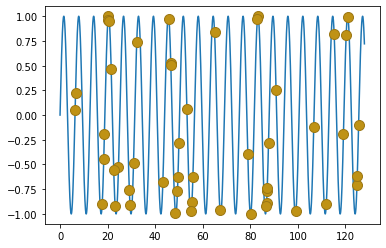

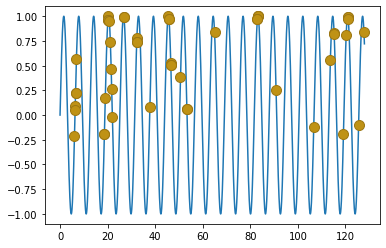

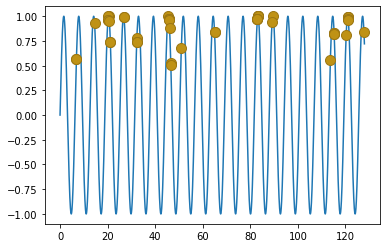

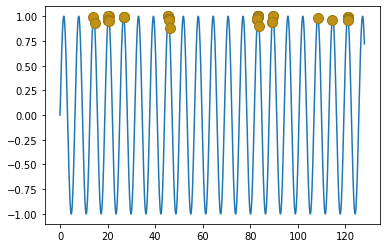

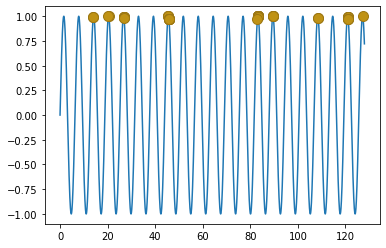

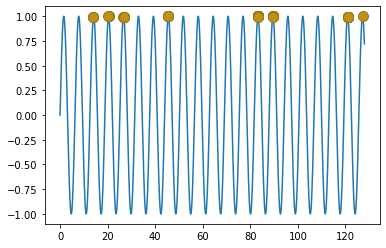

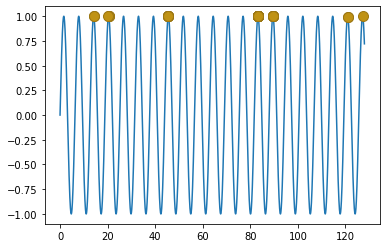

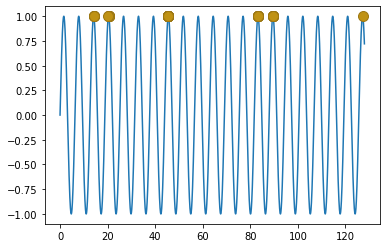

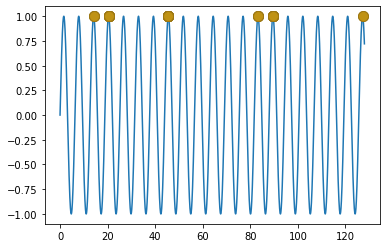

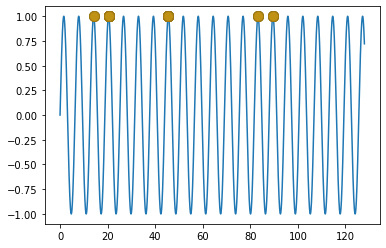

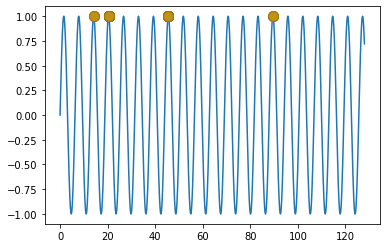

In [6]:
entropy_lst_artificial_task_without_crowding = []

# define custom callback
def callback(population, generation):
    entropy_lst_artificial_task_without_crowding.append(entropy(population))
    plot_population_fitness(population, [0, 128], additional_functions=[np.sin])

        

print('Running genetic algorithm \n')

run_ga(population_size, generations, mutation_rate, crossover_rate, fitness_function, crowding=False, epoch_callback=callback)


### With crowding

Running genetic algorithm 



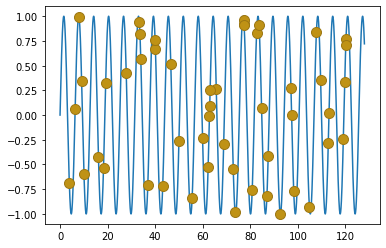

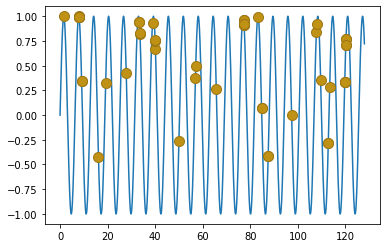

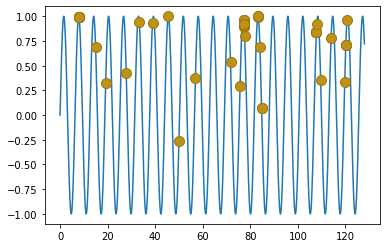

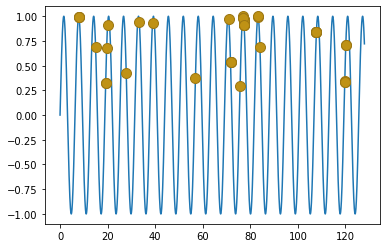

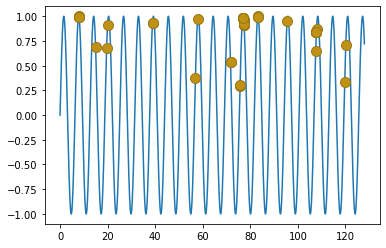

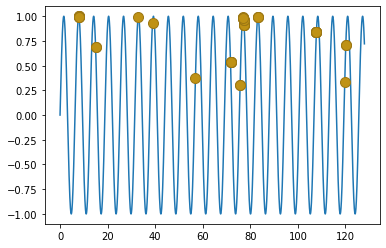

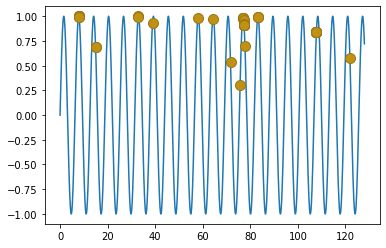

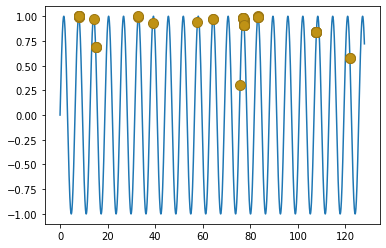

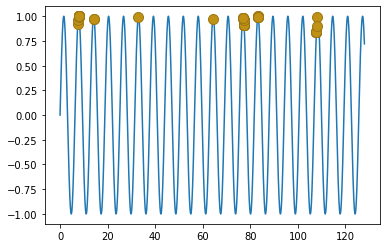

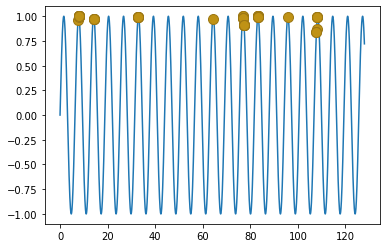

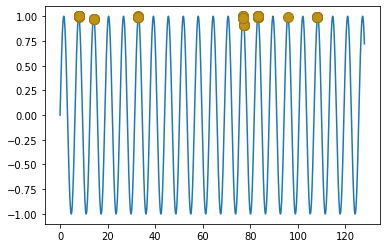

In [7]:
entropy_lst_artificial_task_with_crowding = []


def callback(population, generation):
    entropy_lst_artificial_task_with_crowding.append(entropy(population))
    plot_population_fitness(population, [0, 128], additional_functions=[np.sin])


print('Running genetic algorithm \n')

run_ga(population_size, generations, mutation_rate, crossover_rate, fitness_function, crowding=True, epoch_callback=callback)


### Compare crowding vs no crowding

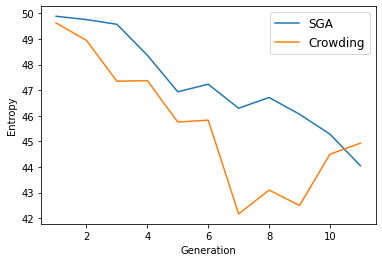

In [8]:
from visualizers.plotters import plot_and_compare_evolutions

plot_and_compare_evolutions(entropy_lst_artificial_task_without_crowding, "SGA", entropy_lst_artificial_task_with_crowding, "Crowding", "Entropy")

# Real task

### Imports

In [9]:
from GA.utils import get_avg_fitness, entropy
from GA.algorithm import run_ga
from metrics.lin_reg import get_fitness, get_columns
from visualizers.plotters import plot_evolution

### Parameters

In [10]:
population_size = 50
generations = 100
crossover_rate = 0.8
mutation_rate = 0.1

### Fitness function

In [11]:
def fitness_function(bitstring):
    columns = get_columns(data, bitstring)
    rmse = get_fitness(columns, targets)
    
    # since we want lower rmse to be better
    positive_fitness = 1 / ((rmse**4) * 100)
    return rmse, positive_fitness, None

### SGA

RMSE without feature selection:  0.13185533117254247

Running genetic algorithm 

Generation   0  | Population RMSE ==>   0.1337457860752887
Generation  10  | Population RMSE ==>   0.12801292658409952
Generation  20  | Population RMSE ==>   0.12669416704726127
Generation  30  | Population RMSE ==>   0.12613103832723135
Generation  40  | Population RMSE ==>   0.12552942401397796
Generation  50  | Population RMSE ==>   0.12495841687792777
Generation  60  | Population RMSE ==>   0.12485552945909
Generation  70  | Population RMSE ==>   0.12471158894613919
Generation  80  | Population RMSE ==>   0.12465665353221157
Generation  90  | Population RMSE ==>   0.12455532693870955
Generation  100  | Population RMSE ==>   0.1243981477747385


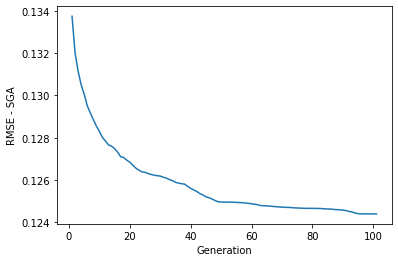

In [12]:
entropy_lst_real_task_without_crowding = []
rmse_lst_without_crowding = []


# define custom callback
def callback(population, generation):
    entropy_lst_real_task_without_crowding.append(entropy(population))
    rmse = get_avg_fitness(population)
    rmse_lst_without_crowding.append(rmse)
    if generation % 10 == 0:
        space = " " if generation == 0 else ""
        print('Generation', space, str(generation) ,' | Population RMSE ==>  ', rmse)



print('RMSE without feature selection: ', get_fitness(data, targets))

print('\nRunning genetic algorithm \n')

run_ga(population_size, generations, mutation_rate, crossover_rate, fitness_function, epoch_callback=callback)

plot_evolution(rmse_lst_without_crowding, "RMSE - SGA")

### With crowding

RMSE without feature selection:  0.13185533117254247

Running genetic algorithm 

Generation   0  | Population RMSE ==>   0.1343223386552037
Generation  10  | Population RMSE ==>   0.13042832557443643
Generation  20  | Population RMSE ==>   0.12890409379395273
Generation  30  | Population RMSE ==>   0.12802703519738862
Generation  40  | Population RMSE ==>   0.12792554342816886
Generation  50  | Population RMSE ==>   0.12761313013775996
Generation  60  | Population RMSE ==>   0.12733515116103672
Generation  70  | Population RMSE ==>   0.12659924836691017
Generation  80  | Population RMSE ==>   0.12620960584540308
Generation  90  | Population RMSE ==>   0.12601435070453845
Generation  100  | Population RMSE ==>   0.12597154789524254


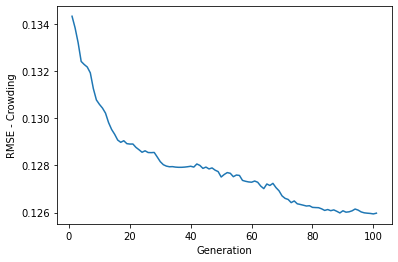

In [13]:
entropy_lst_real_task_with_crowding = []
rmse_lst_with_crowding = []


# define custom callback
def callback(population, generation):
    entropy_lst_real_task_with_crowding.append(entropy(population))
    rmse = get_avg_fitness(population)
    rmse_lst_with_crowding.append(rmse)
    if generation % 10 == 0:
        space = " " if generation == 0 else ""
        print('Generation', space, str(generation) ,' | Population RMSE ==>  ', rmse)

        

print('RMSE without feature selection: ', get_fitness(data, targets))

print('\nRunning genetic algorithm \n')

run_ga(population_size, generations, mutation_rate, crossover_rate, fitness_function, crowding=True, epoch_callback=callback)

plot_evolution(rmse_lst_with_crowding, "RMSE - Crowding")

### Compare crowding vs no crowding

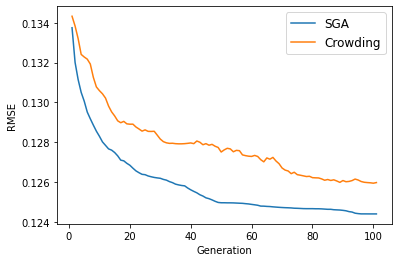

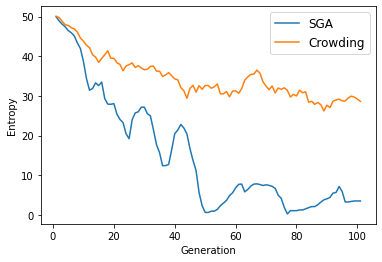

In [14]:
from visualizers.plotters import plot_and_compare_evolutions

plot_and_compare_evolutions(rmse_lst_without_crowding, "SGA", rmse_lst_with_crowding, "Crowding", "RMSE")
plot_and_compare_evolutions(entropy_lst_real_task_without_crowding, "SGA", entropy_lst_real_task_with_crowding, "Crowding", "Entropy")